In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/student-mat.csv", sep=";")
print(df.head()) # so we have  [5 rows x 33 columns]

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [24]:
print(df.isnull().sum())

print(df.dtypes)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      obje

In [25]:
df = df.dropna()

so the data type in int and theres no null values in our dataset 


In [26]:
df = pd.get_dummies(df, drop_first=True)
print(df.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [27]:
# !pip install scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'absences', 'G1', 'G2']
df[num_cols] = scaler.fit_transform(df[num_cols])



###  Feature Scaling with StandardScaler

We standardize numerical features (`age`, `absences`, `G1`, `G2`) using `StandardScaler` from scikit-learn.  
This scales the data to have a mean of 0 and standard deviation of 1 — useful for improving model performance.

\[
x_{scaled} = \frac{x - \mu}{\sigma}
\]


In [28]:
df['avg_grade'] = (df['G1'] + df['G2']) / 2

print(df.head())


        age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0  1.023046     4     4           2          2         0       4         3   
1  0.238380     1     1           1          2         0       5         3   
2 -1.330954     1     1           1          2         3       4         3   
3 -1.330954     4     2           1          3         0       3         2   
4 -0.546287     3     3           1          2         0       4         3   

   goout  Dalc  ...  guardian_other  schoolsup_yes  famsup_yes  paid_yes  \
0      4     1  ...           False           True       False     False   
1      3     1  ...           False          False        True     False   
2      2     2  ...           False           True       False      True   
3      2     1  ...           False          False        True      True   
4      2     1  ...           False          False        True      True   

   activities_yes  nursery_yes  higher_yes  internet_yes  romantic_yes  \


okay this a new feature with the average of G1,G2 to be compared to the predicted G3

In [29]:
X = df.drop('G3', axis=1)
y = df['G3']

splitting the data to input and output

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

splitting into data training set and testing set 

In [31]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

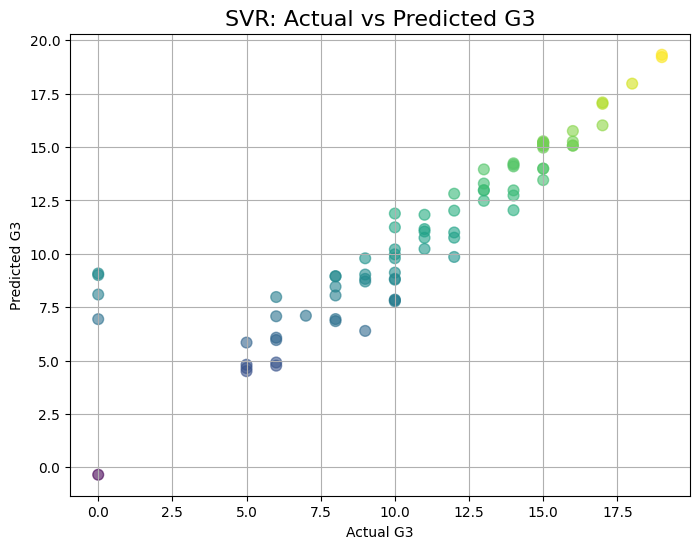

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=60, c=y_pred, cmap='viridis')


plt.title("SVR: Actual vs Predicted G3", fontsize=16)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)

plt.show()

## Correlation Heatmap (numeric features only)

Here we're calculating the correlation coefficients between all numerical features in our dataset using the Pearson correlation method. 

In [33]:
correlation_matrix = df.corr(numeric_only=True)

print("Correlation matrix:")
correlation_matrix

Correlation matrix:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,avg_grade
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,...,0.398396,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,-0.107841
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,...,-0.118635,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,0.218674
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,...,-0.091250,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,0.184535
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,...,0.048758,-0.009246,-0.003286,-0.066420,-0.007766,-0.033338,-0.083508,-0.111302,0.021962,-0.127940
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,...,0.031724,0.037763,0.145228,0.167220,0.089877,0.081325,0.175081,0.059422,0.053285,0.154051
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,...,0.291157,-0.000437,-0.055075,-0.188039,-0.069341,-0.100734,-0.300316,-0.063451,0.093137,-0.369219
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,...,0.049548,-0.001345,-0.020436,0.000460,0.040687,-0.003581,0.024319,0.032768,-0.063816,0.002020
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,...,0.069438,-0.045465,0.010538,-0.064253,0.089728,-0.024696,-0.061244,0.051286,-0.011182,-0.000605
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,...,-0.012380,-0.037698,-0.015631,0.010493,0.046088,0.004612,-0.039700,0.074370,0.007870,-0.161773
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,...,0.037626,-0.021485,-0.031575,0.062465,-0.066508,-0.084849,-0.069828,0.036210,0.015121,-0.082238


This code creates a visual representation of the correlation matrix using a heatmap:


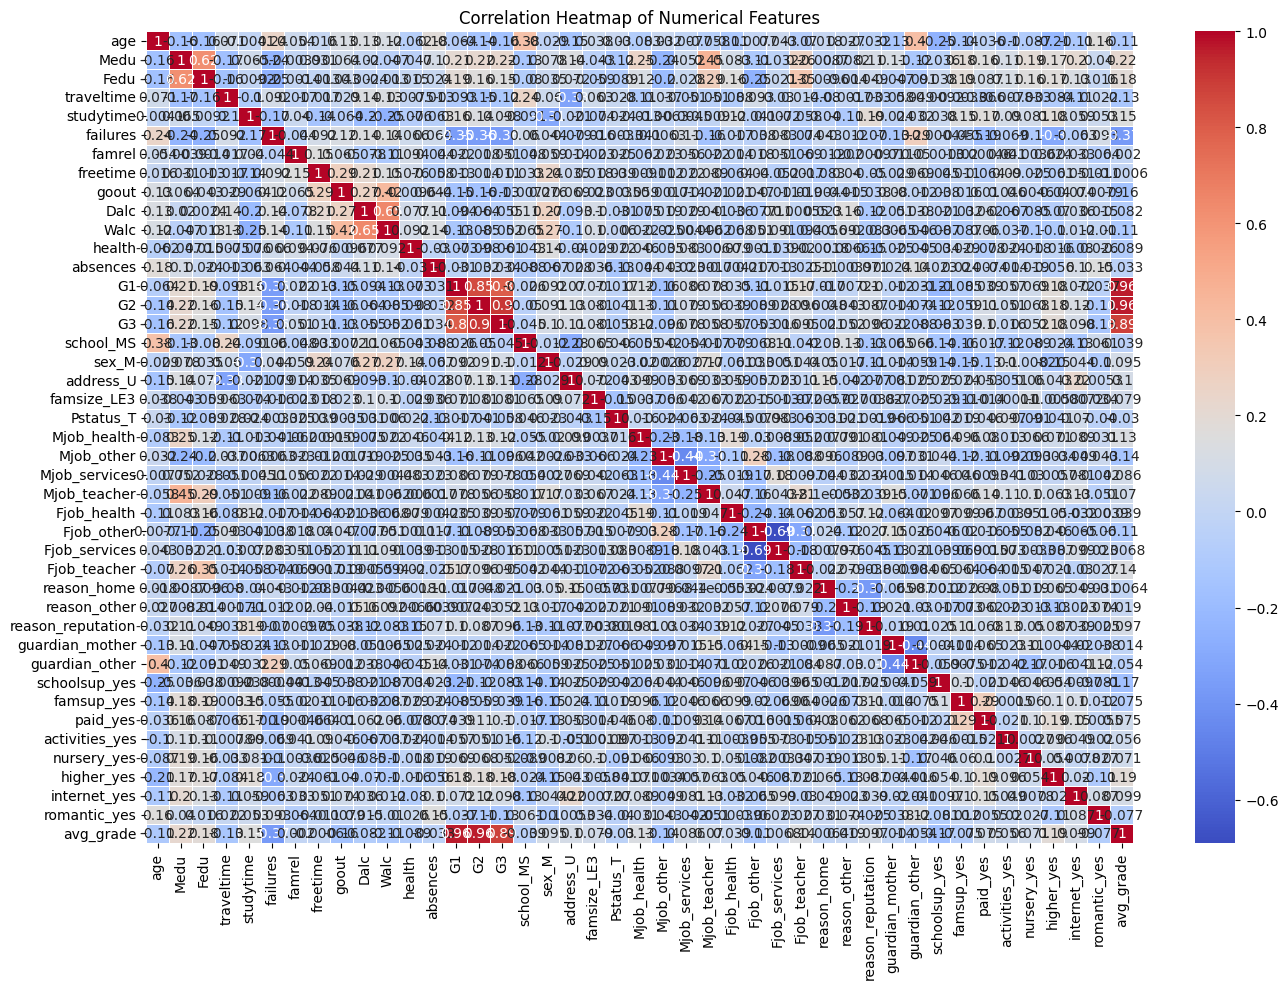

In [34]:
# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

## Relationships with Final Grade (G3)


This section creates scatter plots to visualize relationships between selected features and the final grade (G3). We're focusing on five potentially important predictors:
- **G1**: First period grade
- **G2**: Second period grade
- **studytime**: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures**: Number of past class failures
- **absences**: Number of school absences

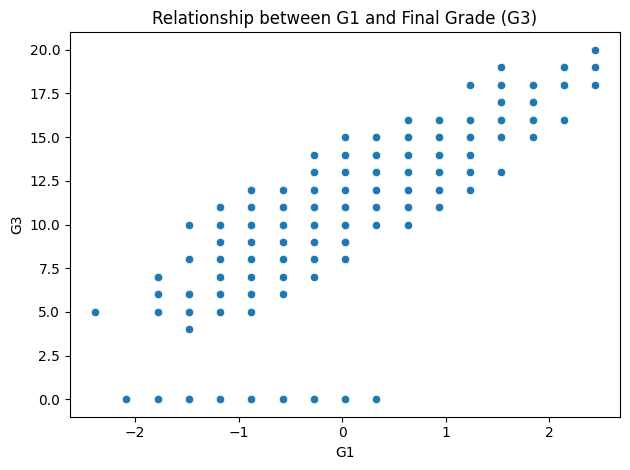

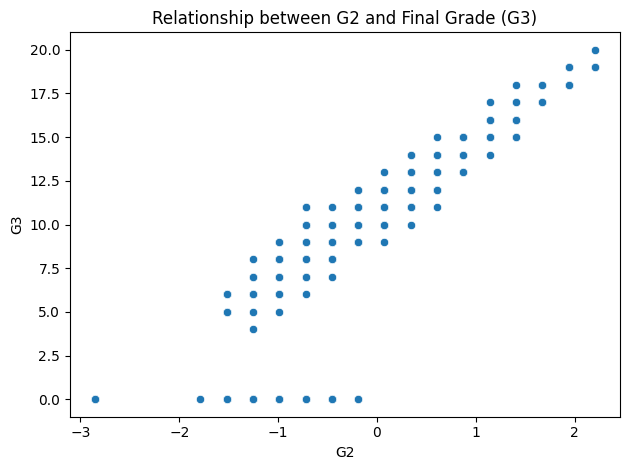

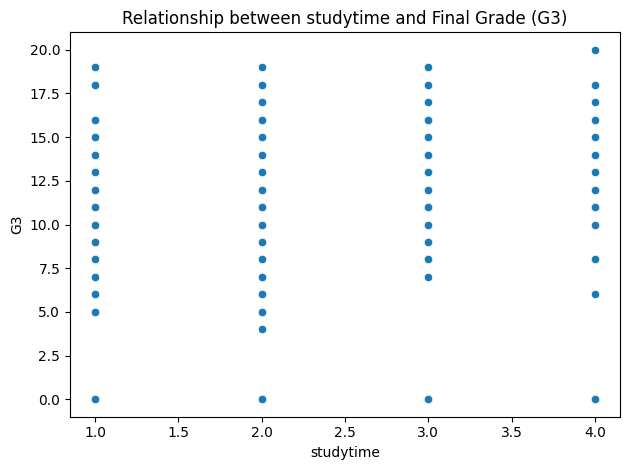

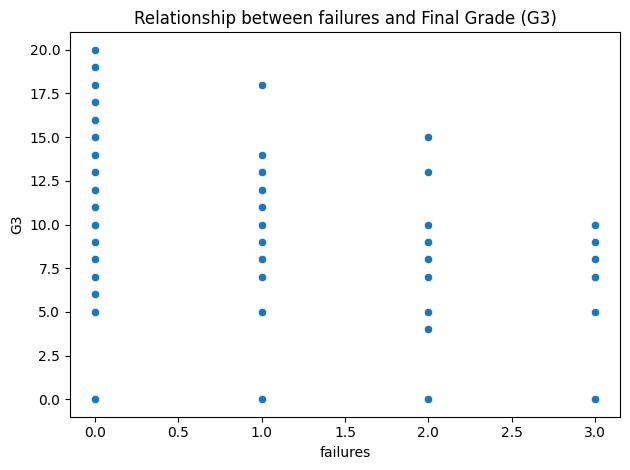

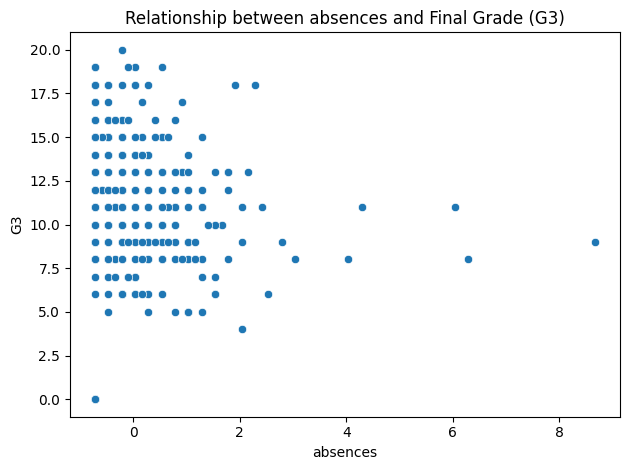

In [35]:

# Scatter plots for selected features vs G3
features_to_plot = ['G1', 'G2', 'studytime', 'failures', 'absences']

for feature in features_to_plot:
    plt.figure()
    sns.scatterplot(data=df, x=feature, y='G3')
    plt.title(f'Relationship between {feature} and Final Grade (G3)')
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.tight_layout()
    plt.show()

## Histogram
This histogram visualizes the distribution of final grades (G3) across all students in the dataset


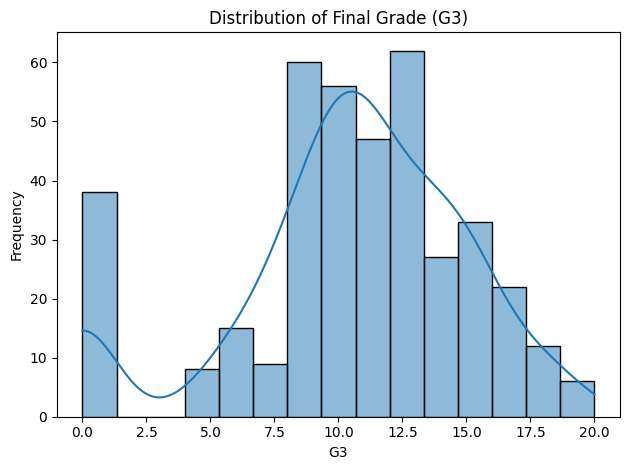

In [36]:
# Histogram of G3 distribution
plt.figure()
sns.histplot(df['G3'], kde=True, bins=15)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("G3")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Impact of Categorical Features on G3
This final section explores how categorical features might influence final grades by creating boxplots for selected categorical variables:

- **sex**: Student's gender ('F' - female or 'M' - male)
- **schoolsup**: Extra educational support ('yes' or 'no')
- **famsup**: Family educational support ('yes' or 'no')
- **higher**: Wants to take higher education ('yes' or 'no')
- **internet**: Internet access at home ('yes' or 'no')

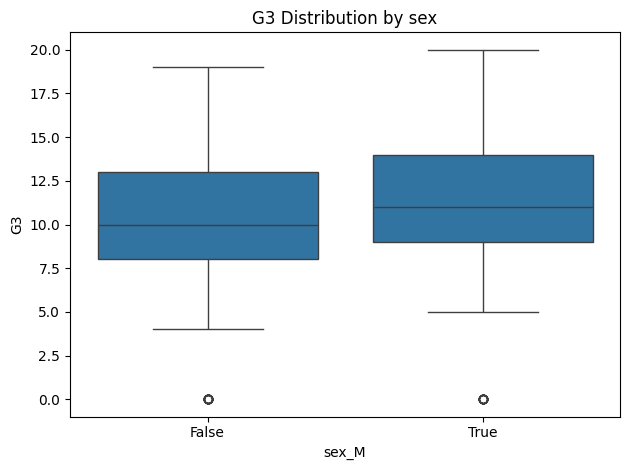

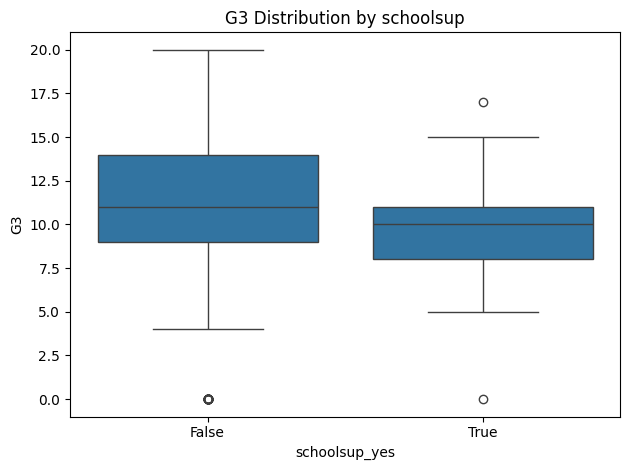

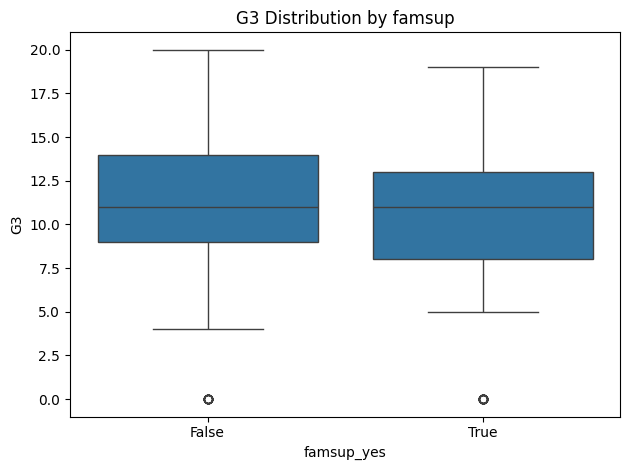

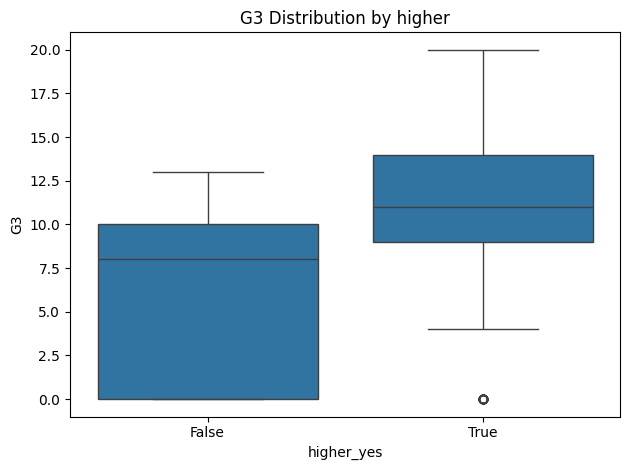

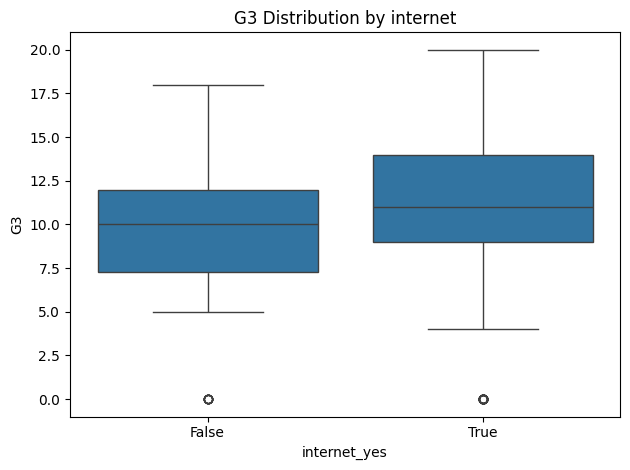

In [38]:
# Boxplots to compare G3 across categorical features
# Map original categorical feature names to their one-hot encoded column names
categorical_features_mapping = {
    'sex': 'sex_M',
    'schoolsup': 'schoolsup_yes',
    'famsup': 'famsup_yes',
    'higher': 'higher_yes',
    'internet': 'internet_yes'
}

for cat, encoded_cat in categorical_features_mapping.items():
    plt.figure()
    sns.boxplot(data=df, x=encoded_cat, y='G3')
    plt.title(f"G3 Distribution by {cat}")
    plt.tight_layout()
    plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 4.39
Mean Absolute Error (MAE): 1.09
R² Score: 0.79


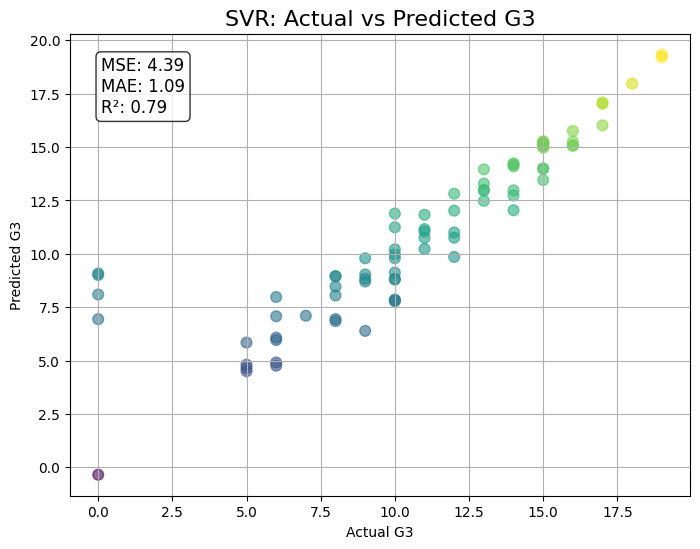

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=60, c=y_pred, cmap='viridis')

# Add titles and labels
plt.title("SVR: Actual vs Predicted G3", fontsize=16)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)

# Add error metrics as text annotations
plt.text(
    0.05, 0.95,
    f"MSE: {mse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}",
    fontsize=12,
    transform=plt.gca().transAxes,
    verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

plt.show()